# Árbolos de Decisión de Regresión

## Ejercicio Dataset Consumo de gasolina en EEUU

### Importar librerías y conocer Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/petrol_consumption.csv", encoding='utf-8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gasolina_impuesto                     48 non-null     float64
 1   ingreso_promedio                      48 non-null     int64  
 2   carreteras_pavimentadas               48 non-null     int64  
 3   porcen_licencias_conducion_poblacion  48 non-null     float64
 4   gasolina_Consumo                      48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
data.describe()

,gasolina_impuesto,ingreso_promedio,carreteras_pavimentadas,porcen_licencias_conducion_poblacion,gasolina_Consumo
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
data.isnull().sum()

gasolina_impuesto                       0
ingreso_promedio                        0
carreteras_pavimentadas                 0
porcen_licencias_conducion_poblacion    0
gasolina_Consumo                        0
dtype: int64

### Graficar la data

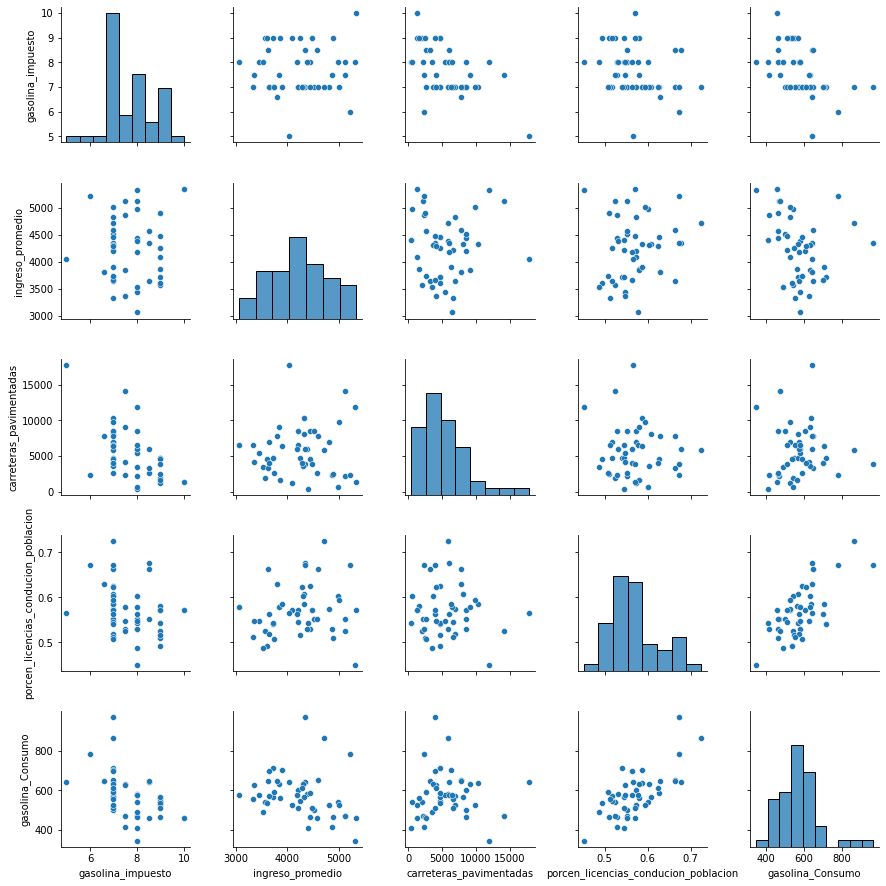

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

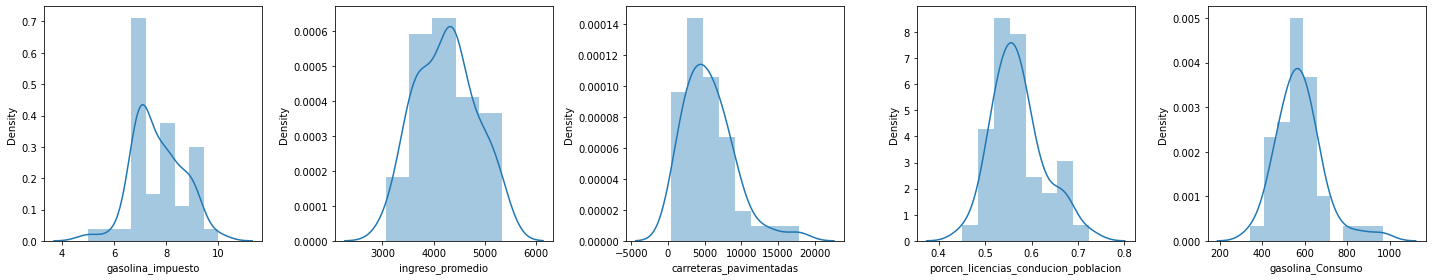

In [ ]:
cols = 5

fig, ax = plt.subplots(ncols=cols, figsize=(20,4))

col = data.columns
index = 0

for i in range(cols):
  sns.distplot(data[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()

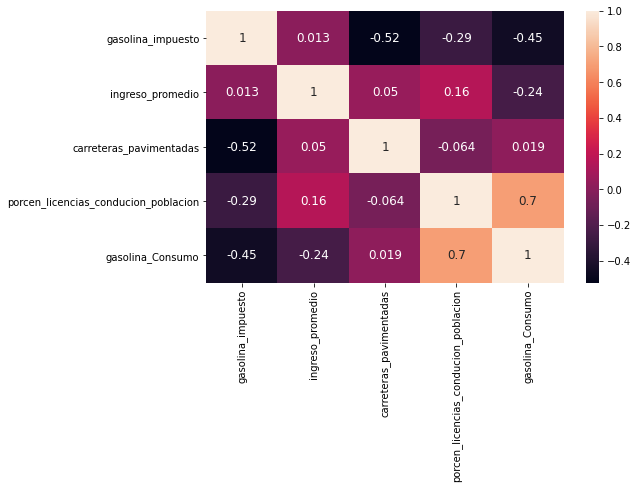

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, annot_kws={'size':12})

### Separar la data en X y Y

In [ ]:
y = data['gasolina_Consumo']
X= data['gasolina_impuesto'].to_numpy()

X = X.reshape(-1,1)
print(X)

[[ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 7.5 ]
 [ 8.  ]
 [10.  ]
 [ 8.  ]
 [ 8.  ]
 [ 8.  ]
 [ 7.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 8.5 ]
 [ 7.  ]
 [ 8.  ]
 [ 9.  ]
 [ 9.  ]
 [ 8.5 ]
 [ 9.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 8.  ]
 [ 9.  ]
 [ 7.  ]
 [ 7.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 8.  ]
 [ 6.58]
 [ 5.  ]
 [ 7.  ]
 [ 8.5 ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 6.  ]
 [ 9.  ]
 [ 7.  ]
 [ 7.  ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Aplicar Árbol de Regresión

In [ ]:
arbol_regresion = DecisionTreeRegressor()
arbol_regresion.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predic = arbol_regresion.predict(X_test)

In [ ]:
data_prediccion = pd.DataFrame({'Dacto Actual':y_test, 'Dato Predicho':y_predic})
data_prediccion

,Dacto Actual,Dato Predicho
29,534,530.428571
4,410,480.500000
26,577,480.500000
30,571,633.812500
32,577,480.500000
37,704,633.812500
34,487,480.500000
40,587,633.812500
7,467,480.500000
10,580,480.500000


In [ ]:
accuracy_global = arbol_regresion.score(X_test, y_test)

print('Precisión Global: %', str(accuracy_global * 100))
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_predic))
print('Error medio cuadrado:', metrics.mean_squared_error(y_test, y_predic))
print('Desviación de la raíz cuadrada media:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))

Precisión Global: % 23.550099376747923
Error absoluto medio: 56.638392857142854
Error medio cuadrado: 4479.536057079082
Desviación de la raíz cuadrada media: 66.9293362964185


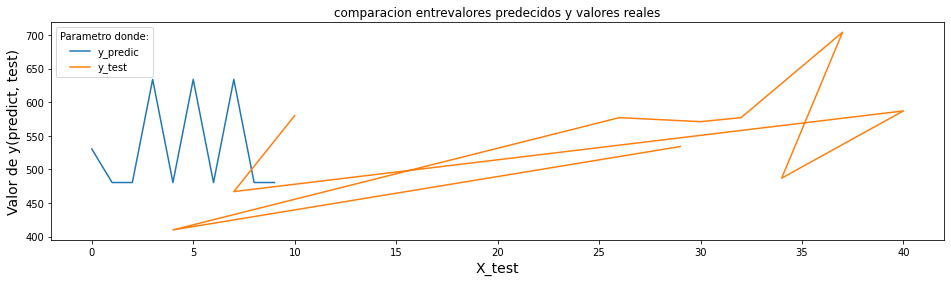

In [ ]:
plt.figure(figsize=(16,4))

plt.plot(y_predic, label='y_predic')
plt.plot(y_test, label='y_test')

plt.xlabel('X_test', fontsize=14)
plt.ylabel('Valor de y(predict, test)', fontsize=14)

plt.title('comparacion entrevalores predecidos y valores reales')
plt.legend(title='Parametro donde:')

plt.show()

In [ ]:
print(y_test)

29    534
4     410
26    577
30    571
32    577
37    704
34    487
40    587
7     467
10    580
Name: gasolina_Consumo, dtype: int64


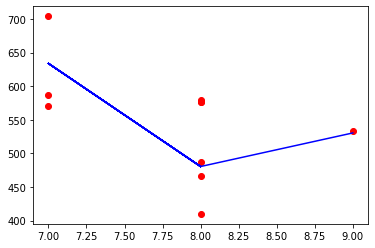

In [ ]:
plt.scatter(X_test, y_test, color="red")

plt.plot(X_test, arbol_regresion.predict(X_test), color="blue")
plt.show()

### Diagrama del Árbol de Regresión

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_regresion, feature_names=['gasolina_Consumo'])
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_gasolina.png')

True

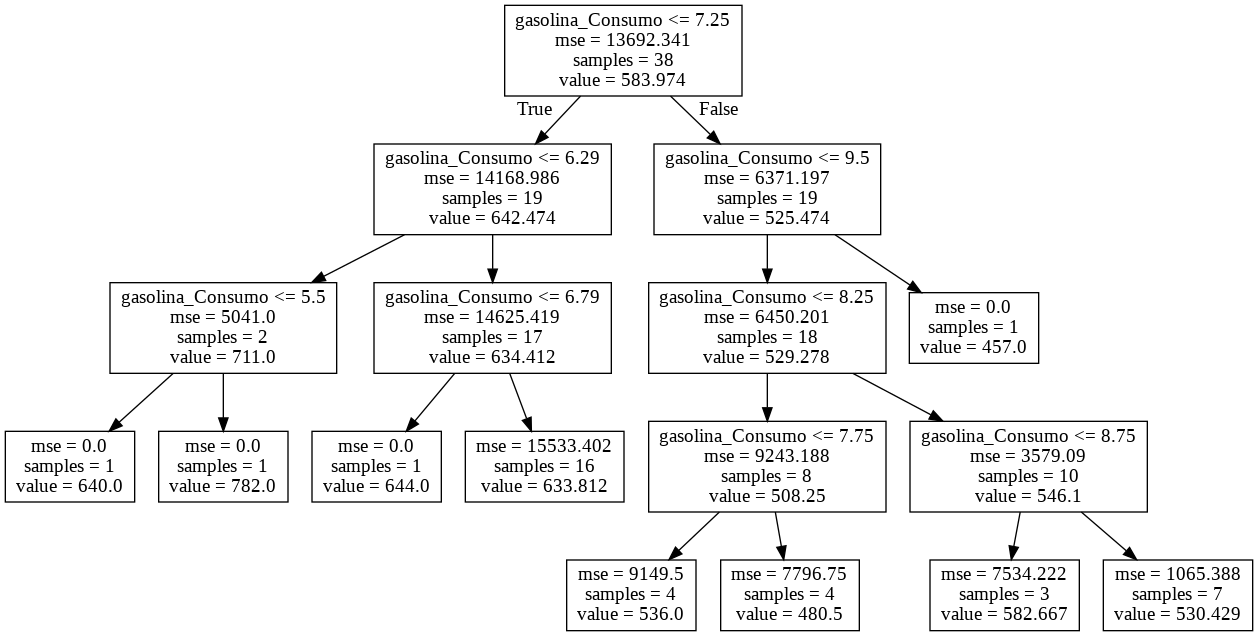